In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Vizualizatsiya sozlamalari
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Rasmlarni saqlash uchun papka
plots_dir = Path('plots')
plots_dir.mkdir(exist_ok=True)


In [11]:
# Ma'lumotlarni yuklash
df = pd.read_csv('results.csv')

In [12]:
# Asosiy statistika
default_counts = df['default'].value_counts().sort_index()
default_percent = df['default'].value_counts(normalize=True).sort_index() * 100

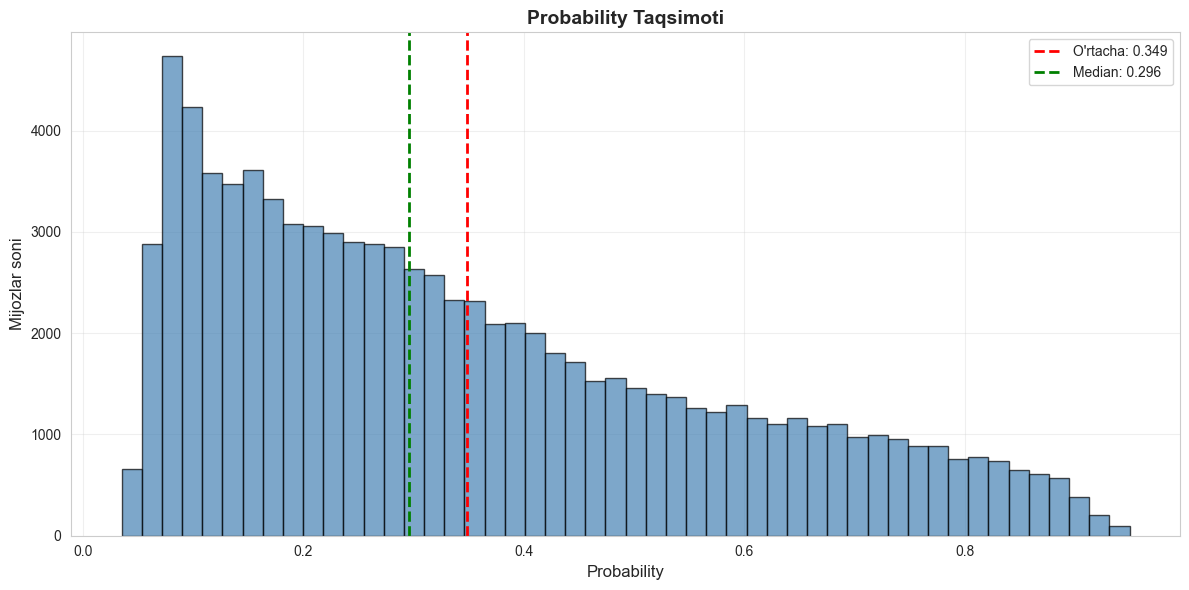

In [13]:
# Probability distribution (Histogram)
plt.figure(figsize=(12, 6))
plt.hist(df['prob'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
plt.axvline(df['prob'].mean(), color='red', linestyle='--', linewidth=2, label=f"O'rtacha: {df['prob'].mean():.3f}")
plt.axvline(df['prob'].median(), color='green', linestyle='--', linewidth=2, label=f"Median: {df['prob'].median():.3f}")
plt.xlabel('Probability', fontsize=12)
plt.ylabel('Mijozlar soni', fontsize=12)
plt.title('Probability Taqsimoti', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(plots_dir / 'probability_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


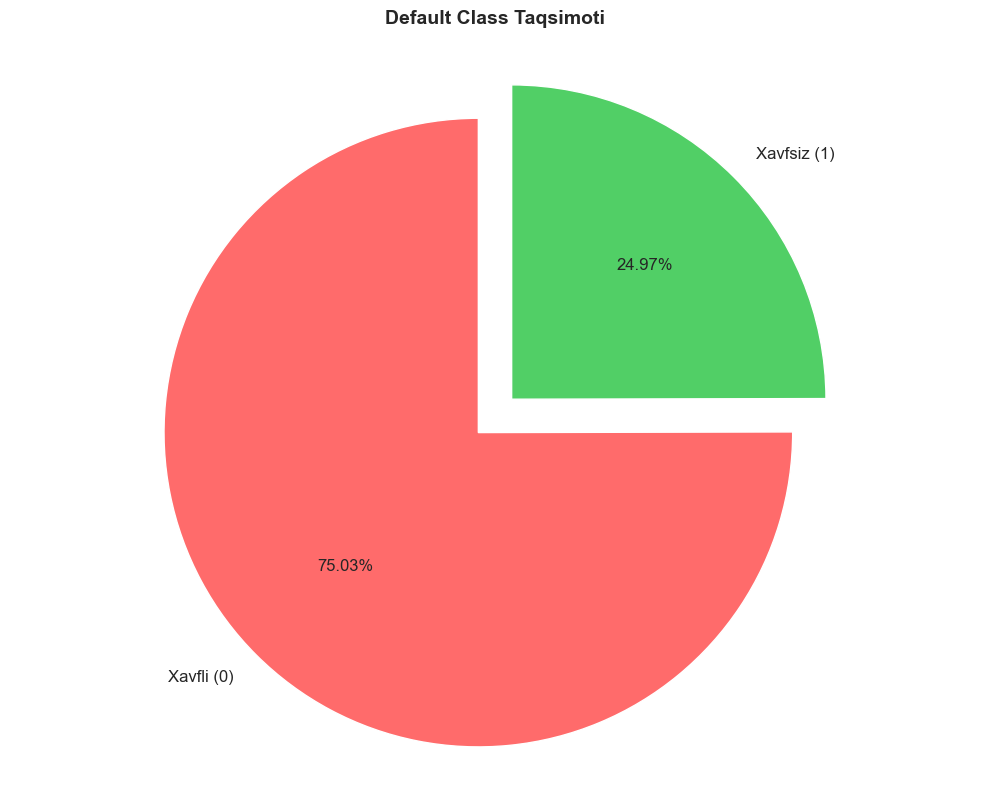

In [14]:
# Default class distribution (Pie chart)
default_counts = df['default'].value_counts().sort_index()
labels = ['Xavfli (0)', 'Xavfsiz (1)']
colors = ['#ff6b6b', '#51cf66']
explode = (0.05, 0.1)

plt.figure(figsize=(10, 8))
plt.pie(default_counts, labels=labels, autopct='%1.2f%%', colors=colors, 
        explode=explode, startangle=90, textprops={'fontsize': 12})
plt.title('Default Class Taqsimoti', fontsize=14, fontweight='bold', pad=20)
plt.axis('equal')
plt.tight_layout()
plt.savefig(plots_dir / 'default_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


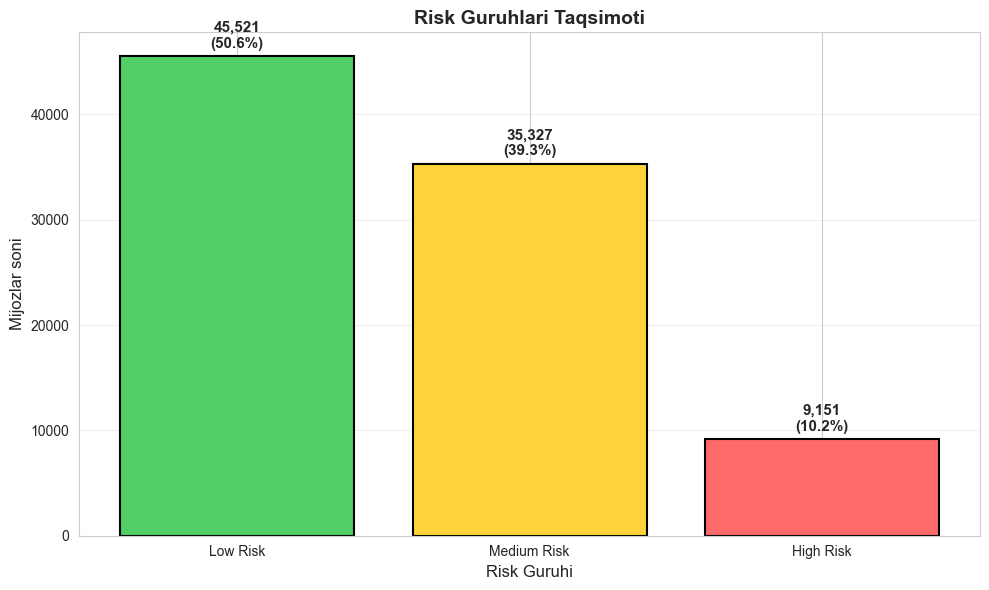

In [15]:
# Risk groups
df['risk_group'] = pd.cut(df['prob'], 
                          bins=[0, 0.3, 0.7, 1.0], 
                          labels=['Low Risk', 'Medium Risk', 'High Risk'])

risk_counts = df['risk_group'].value_counts().sort_index()
risk_percent = df['risk_group'].value_counts(normalize=True).sort_index() * 100

plt.figure(figsize=(10, 6))
bars = plt.bar(risk_counts.index, risk_counts.values, color=['#51cf66', '#ffd43b', '#ff6b6b'], 
               edgecolor='black', linewidth=1.5)
plt.xlabel('Risk Guruhi', fontsize=12)
plt.ylabel('Mijozlar soni', fontsize=12)
plt.title('Risk Guruhlari Taqsimoti', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')

for bar, count, percent in zip(bars, risk_counts.values, risk_percent.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 500,
             f'{count:,}\n({percent:.1f}%)', 
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig(plots_dir / 'risk_groups.png', dpi=300, bbox_inches='tight')
plt.show()

In [16]:
# Threshold analysis
thresholds = [0.3, 0.5, 0.7]
threshold_results = {}

for threshold in thresholds:
    predicted = (df['prob'] >= threshold).astype(int)
    predicted_counts = predicted.value_counts().sort_index()
    predicted_percent = predicted.value_counts(normalize=True).sort_index() * 100
    threshold_results[threshold] = {
        'counts': predicted_counts,
        'percent': predicted_percent
    }


In [ ]:
# Xulosa
print(f"✅ Tahlil yakunlandi!")
print(f"   Jami mijozlar: {len(df):,}")
print(f"   Vizualizatsiyalar: plots/ papkasida")


✅ Tahlil yakunlandi!
   Jami mijozlar: 89,999
   Vizualizatsiyalar: plots/ papkasida


: 